#Improving a model
First prediction = baseline predicition
First model = baseline model

#From data perspective :
    1.Could we obtain more data?
    2.Could we improve our data?(more details)
#From a model perspective:
    1.Is there a better model we could use?
    2.Could we improve the current model

In [9]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [8]:


heart_disease = pd.read_csv("data/heart-disease.csv")
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
##5.1 Tuning hyperparameters by hand

We're going to try and adjust

* min_samples_leaf
* max_depth
* max_featues
* min_samples_split
*n_estimators

In [11]:
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall":round(recall,2),
                   "f1":round(f1,2)}
    print(f"Acc:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 score:{f1:.2f}")

    return metric_dict
    
    

In [21]:
np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)

X= heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]
train_split = round(0.7*len(heart_disease_shuffled))
valid_split = round(train_split +(0.15*len(heart_disease_shuffled)))
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#Make baseline predictions
y_preds = clf.predict(X_valid
                     )

#Evalaute the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc:82.22%
Precision:0.81
Recall:0.88
F1 score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [22]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

y_preds_2 = clf_2.predict(X_valid)
baseline_metrics = evaluate_preds(y_valid,y_preds_2)
baseline_metrics

Acc:82.22%
Precision:0.84
Recall:0.84
F1 score:0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [26]:
np.random.seed(42)
clf_3 = RandomForestClassifier(n_estimators
                               =100,max_depth=10)
clf_3.fit(X_train,y_train)

y_preds_3 = clf_3.predict(X_valid)
baseline_metrics = evaluate_preds(y_valid,y_preds_3)
baseline_metrics

Acc:80.00%
Precision:0.81
Recall:0.84
F1 score:0.82


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

In [43]:
##5.2 Hypertuning with RandomizedSeachCV
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]
     }
np.random.seed(42)
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=5,
                           cv=5,
                           verbose=2
                          )

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200

C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    val

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=5,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [40]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [39]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc:81.97%
Precision:0.73
Recall:0.96
F1 score:0.83


In [44]:
##5.3 Hypertuning using GridSearchCV 
grid_2={"n_estimators":[500,1000,1200],
      "max_depth":[None],
     "max_features":["auto","sqrt"],
     "min_samples_split":[6],
      "min_samples_leaf":[1,2]
     }

from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)
X= heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf_grid = RandomForestClassifier(n_jobs=1)

gr_clf = GridSearchCV(estimator=clf_grid,
                     param_grid=grid_2,
                     cv=5,
                     verbose=2)
gr_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6

C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    val

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [500, 1000, 1200]},
             verbose=2)

In [46]:
gr_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [47]:
gr_y_preds = gr_clf.predict(X_test)
gr_metrics = evaluate_preds(y_test,gr_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


<Axes: >

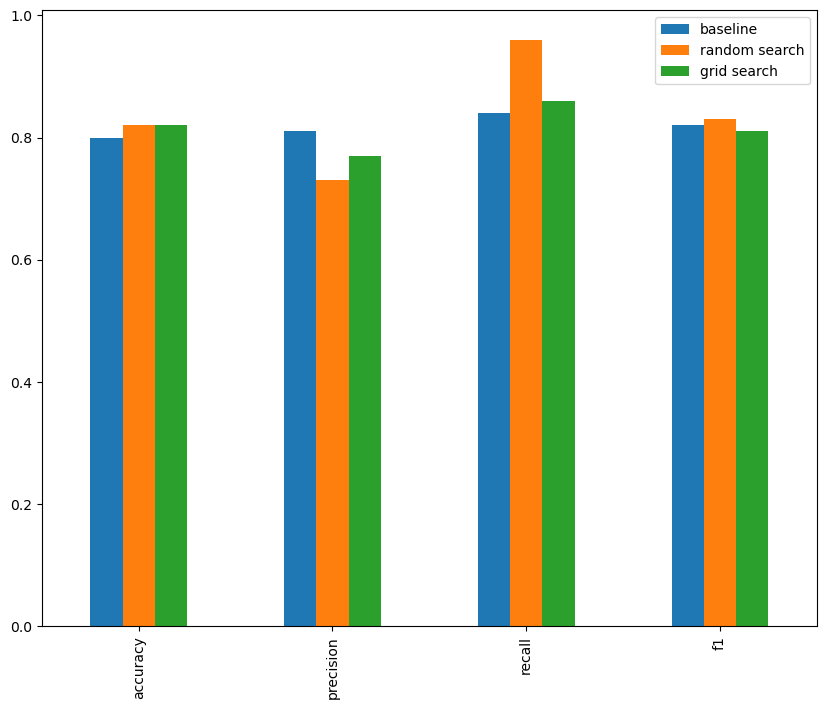

In [49]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                              "random search":rs_metrics,
                              "grid search":gr_metrics})
compare_metrics.plot.bar(figsize=(10,8))

In [ ]:
##Saving and loading trained machine learning models

Two ways to save andload machine learning models:
1.With Python's pickle module
2.With the joblib modeule

In [51]:
import pickle
pickle.dump(gr_clf,open("gs_randomforestmodel_1.pkl","wb"))

In [53]:
#loading model
loaded_pickel_model = pickle.load(open("gs_randomforestmodel_1.pkl","rb"))

In [54]:
##Using joblib

from joblib import dump,load

dump(gr_clf,filename="gs_randomforestmodel_1.joblib")
loaded_job_model = load(filename="gs_randomforestmodel_1.joblib")

In [55]:
###PUTTING EVERYTHING WE LEARNED TOGETHER
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [56]:
data.dtypes


Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [57]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [67]:
#Steps we want to do
#1. Fill missing data
#2 Convert data to number
#3 Built a model on the data

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

import numpy as np
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

#Deine different featues and transformerpipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    "imputer",SimpleImputer(strategy="constant",fill_value="missing"),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
     ] )
door_features=["Doors"]
door_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])

In [70]:
#Setup preprocessing data
preprocessor = ColumnTransformer(transformers=[
                                    ("cat",categorical_transformer,categorical_features),
                                    ("door",door_transformer,door_features),
                                    ("num",numeric_transformer,numeric_features)
                                ])

#Creating a preprocessing and modelling pipeline

model = Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestRegressor())])

x = data.drop("Price",axis=1)
y = data["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: too many values to unpack (expected 2)

In [71]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.22188417408787875

In [74]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


In [ ]:
gs_model.score(X_test, y_test)